### Zadania

Lista składa się z dwóch sekcji: pierwsza (zadania 1 i 2) dotyczy metod detekcji krawędzi, druga (zadania 3 i 4) operacji na histogramach.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

##### Zad. 1: Wyznaczenie gradientów

Wykonaj dla obrazu `coins` sztuczny obraz ilustrujący wielkość (moduł) wektora gradientu w danym punkcie. Do wyświetlenia użyj [mapy kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `hot` do oznaczenia wielkości gradientu odpowiednim kolorem – im większa wartość, tym bardziej czerwony (_mapa ciepła_).

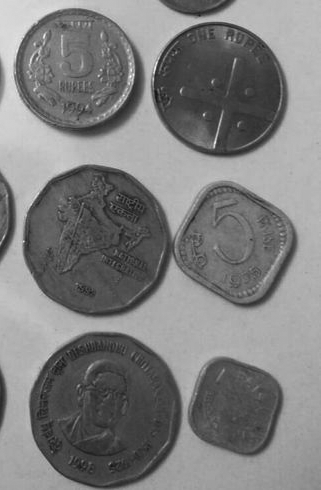

In [3]:
coins = cv2.imread('../dane-1-4/Monety_szare.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins)

Rozwiązanie:

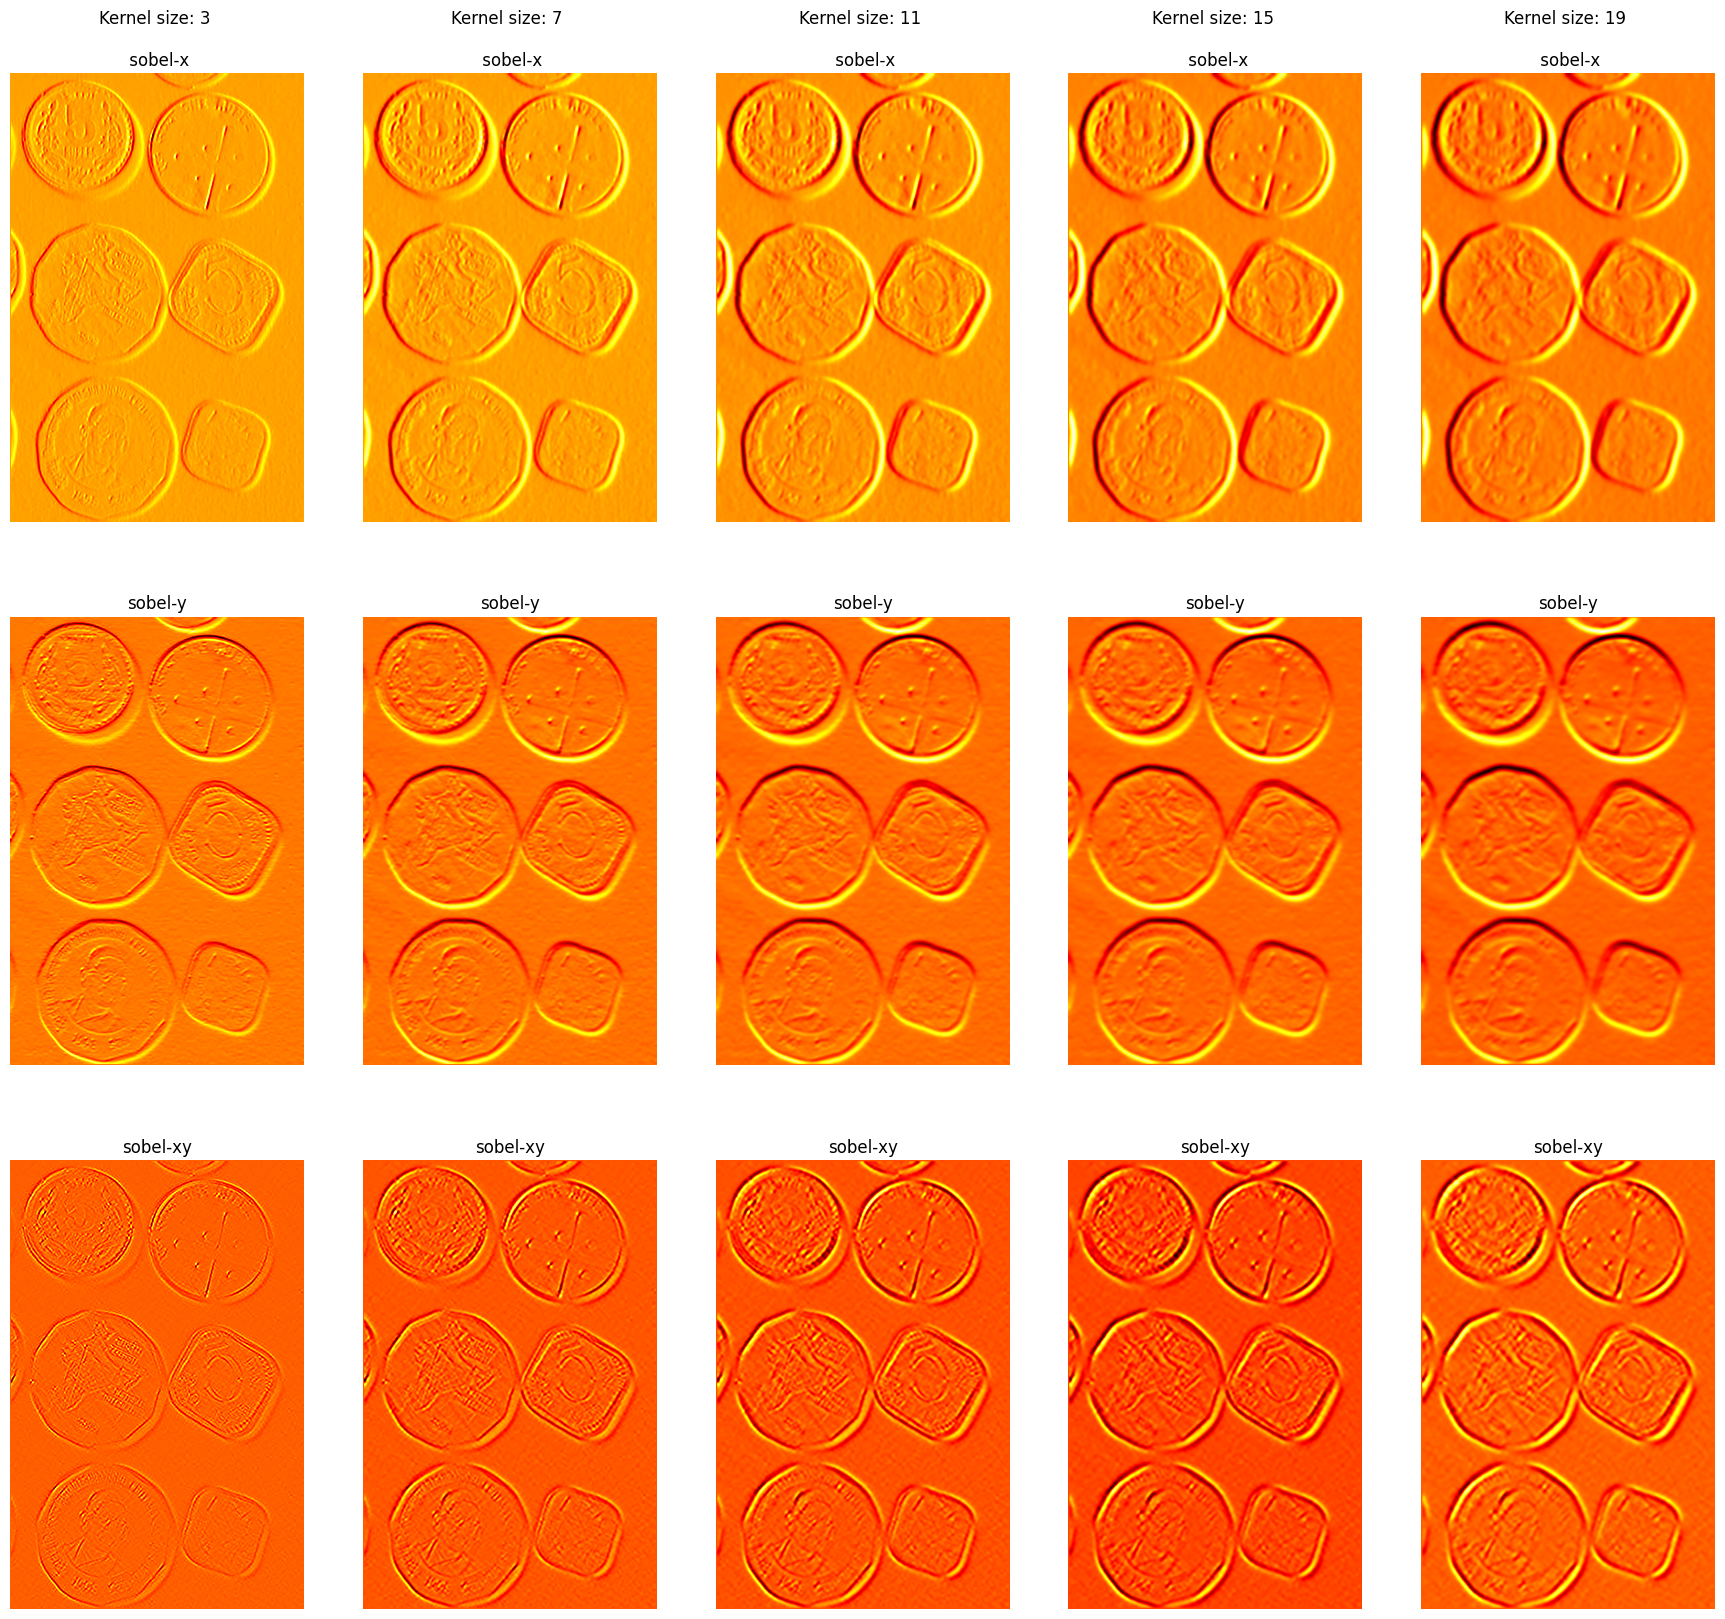

In [4]:
def plot_sobel(data):
    fig, axes = plt.subplots(3, 5, figsize=(22, 20))

    for ax, (ksize, sobelx, sobely, sobelxy) in zip(axes.T, data):
        ax[0].imshow(sobelx, cmap="hot")
        ax[1].imshow(sobely, cmap="hot")
        ax[2].imshow(sobelxy, cmap="hot")

        ax[0].axis("off")
        ax[1].axis("off")
        ax[2].axis("off")

        ax[0].set_title(f"Kernel size: {ksize} \n\n sobel-x")
        ax[1].set_title("sobel-y")
        ax[2].set_title("sobel-xy")

    plt.show()

data = [
    (
        ksize,
        cv2.Sobel(coins, cv2.CV_64F, 1, 0, ksize=ksize),
        cv2.Sobel(coins, cv2.CV_64F, 0, 1, ksize=ksize),
        cv2.Sobel(coins, cv2.CV_64F, 1, 1, ksize=ksize)
    )
    for ksize in [3, 7, 11, 15, 19]
    
]
plot_sobel(data)

---

##### Zad. 2: Detekcja krawędzi

Przeprowadź z obrazem `coins_noise` takie przekształcenia, aby zmaksymalizować możliwość rozpoznania obiektów poprzez detekcję krawędzi. Wykorzystaj filtr Canny'ego dla różnych wartości progów oraz filtry redukcji szumu.

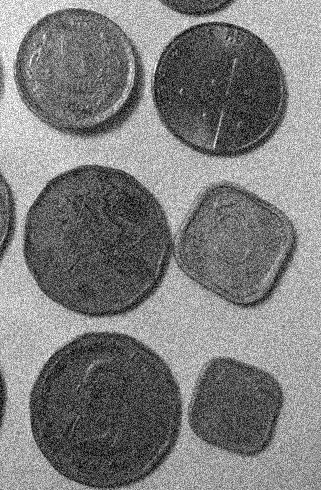

In [2]:
coins_noise = cv2.imread('../dane-1-4/Monety_szare_szum.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins_noise)

Rozwiązanie:

a) Bez redukcji szumu (domyślnie canny robi redukcję szumu w pierwszym kroku przy użyciu filtru gaussa)

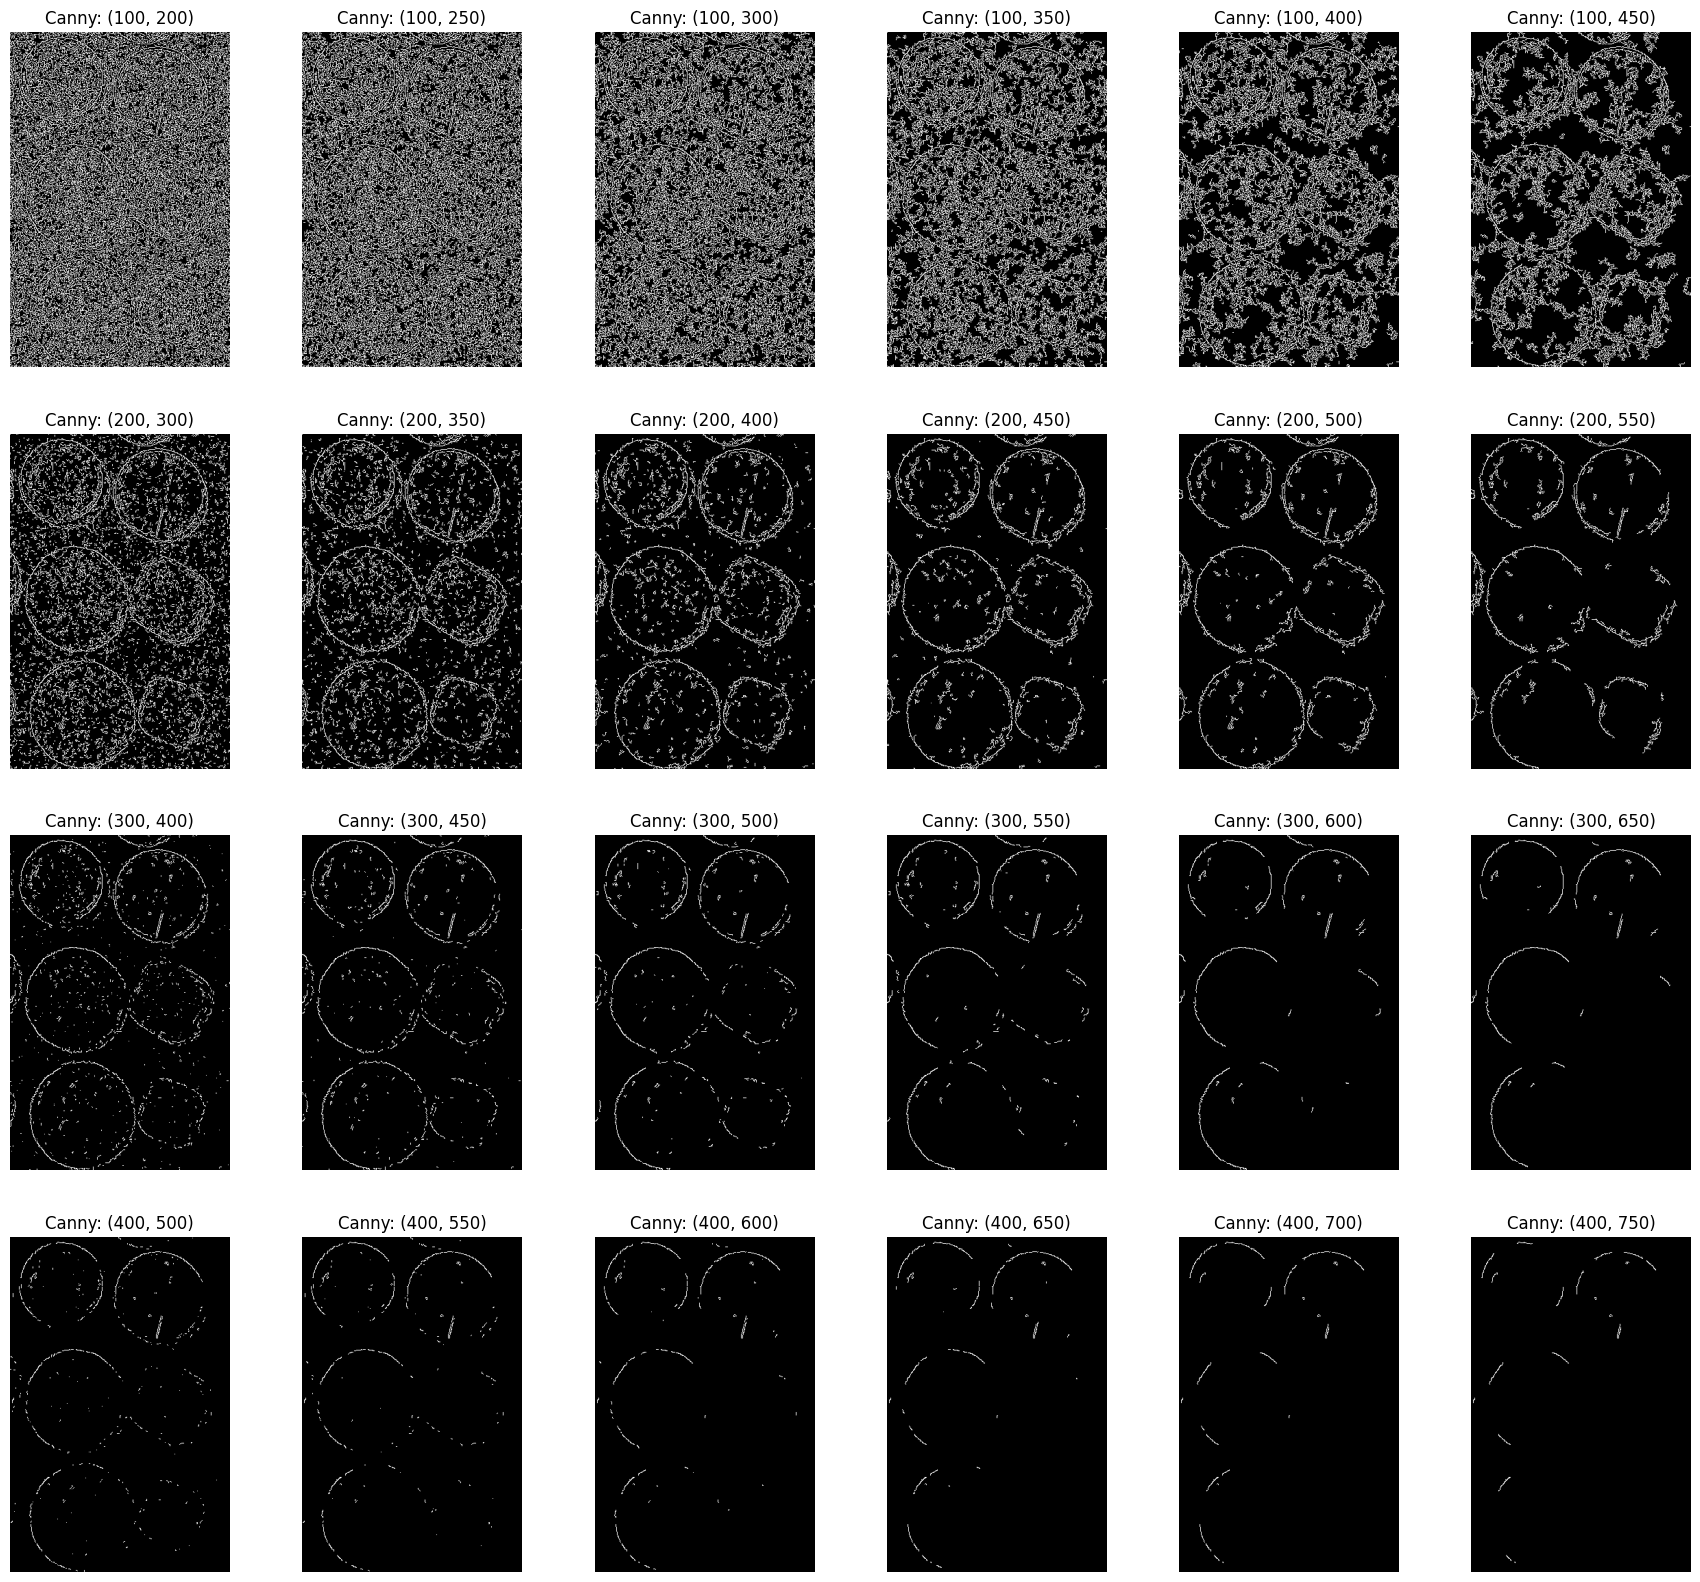

In [6]:
def plot_canny(data):
    fig, axes = plt.subplots(4, 6, figsize=(22, 20))

    for ax, (t1, t2, canny) in zip(axes.flatten(), data):
        ax.imshow(canny, cmap="gray")
        ax.axis("off")
        ax.set_title(f"Canny: ({t1}, {t2})")

    plt.show()

data = [
    (t1, t1 + t2, cv2.Canny(coins_noise, threshold1=t1, threshold2=t1 + t2))
    for t1 in [100, 200, 300, 400] for t2 in [100, 150, 200, 250, 300, 350]    
]
plot_canny(data)

b) Redukcja szumu z filtrem blur (wygładzanie przez średnią)

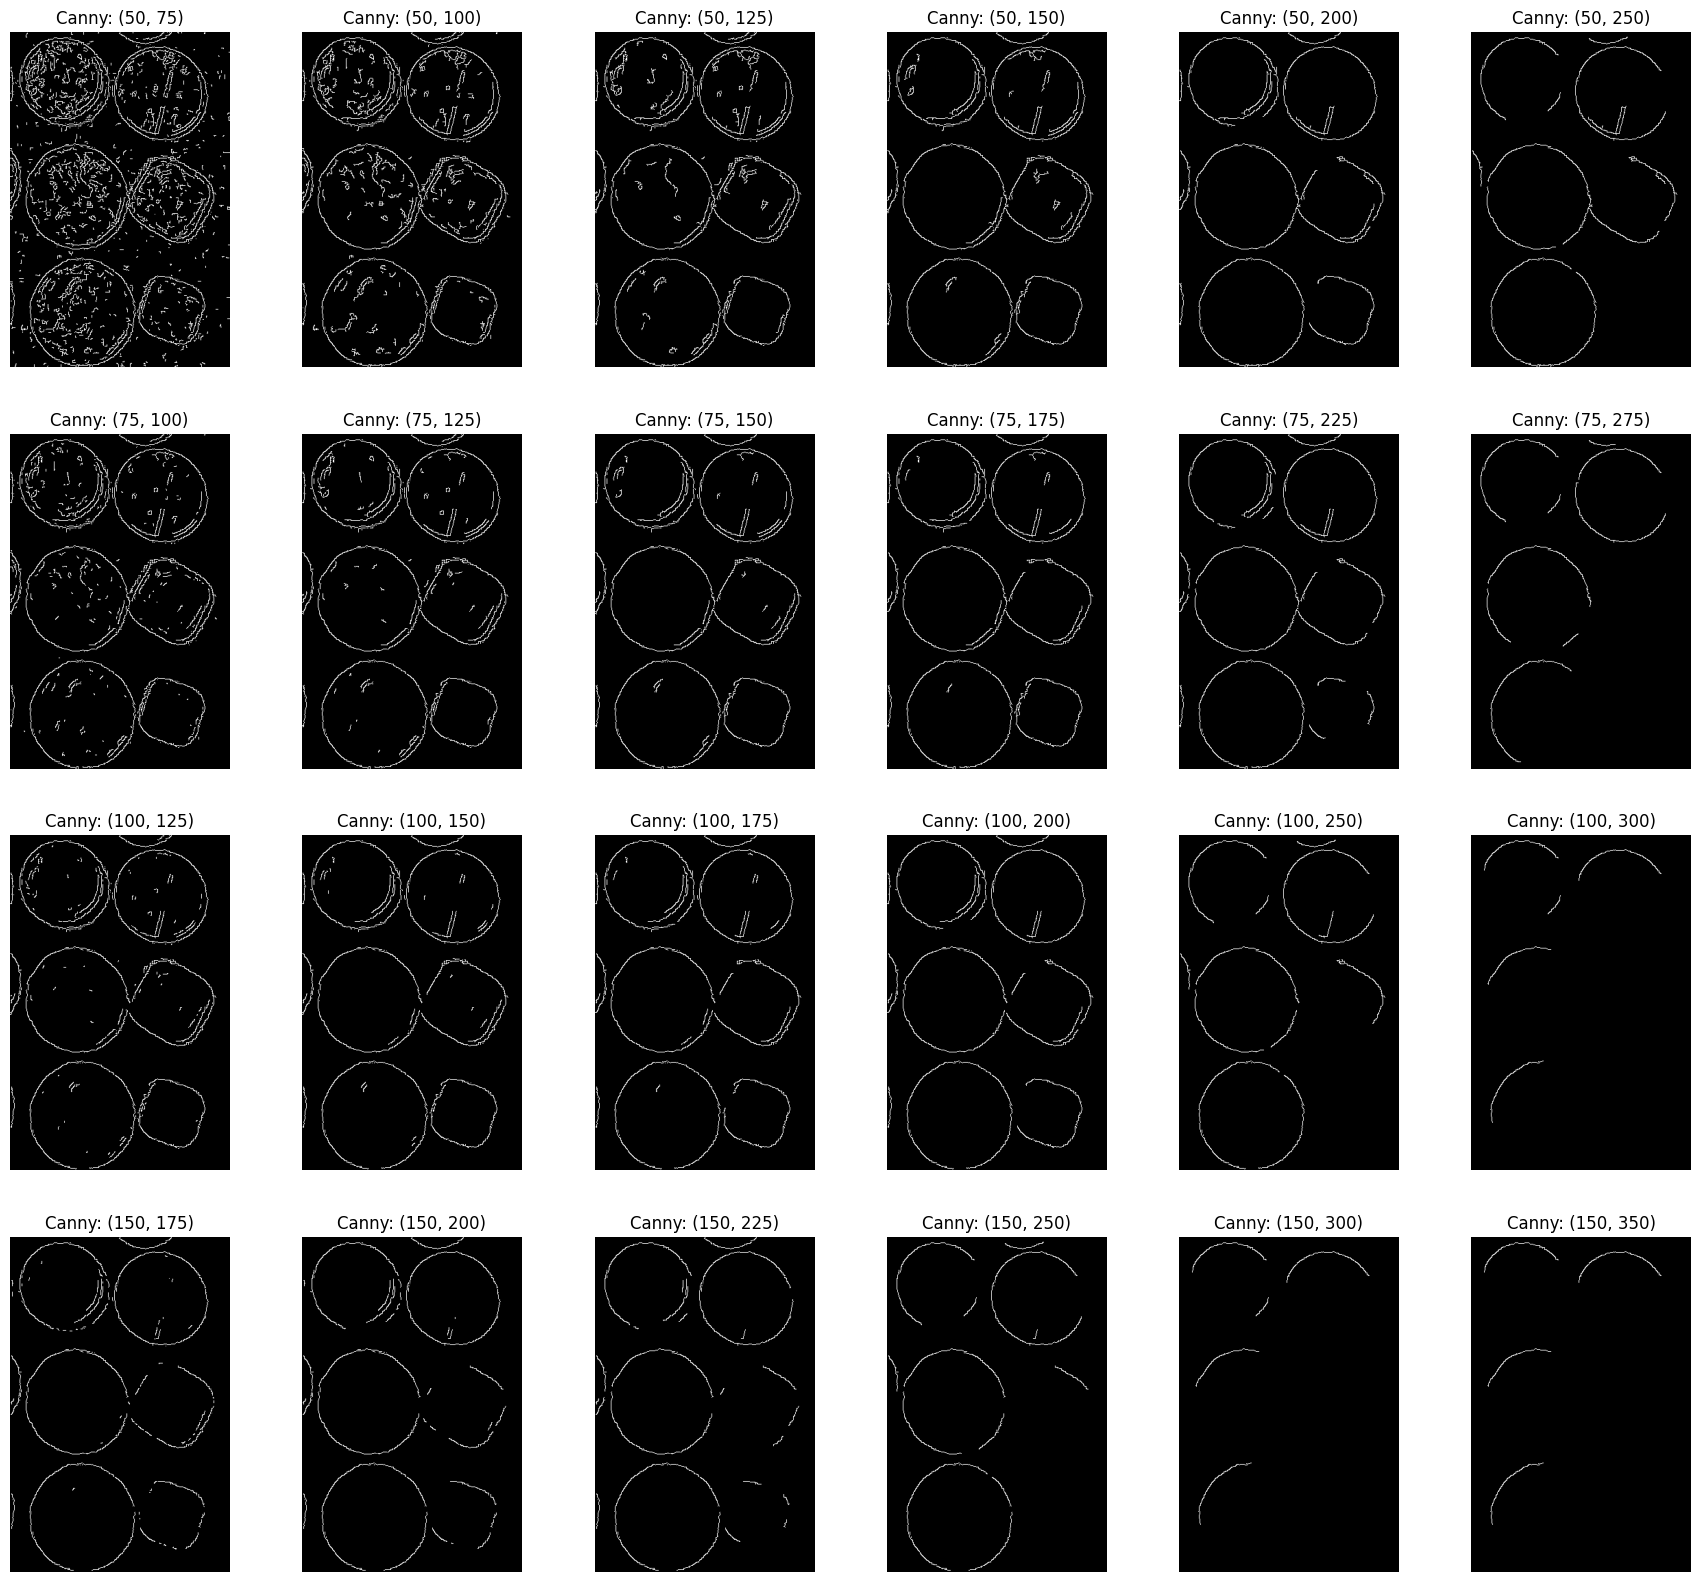

In [14]:
data = [
    (t1, t1 + t2, cv2.Canny(cv2.blur(coins_noise, (5, 5)), threshold1=t1, threshold2=t1 + t2))
    for t1 in [50, 75, 100, 150] for t2 in [25, 50, 75, 100, 150, 200]    
]
plot_canny(data)

---

##### Zad. 3: Wyrównanie histogramu

Wyrównaj histogram obrazu `coins_noise`. Wyniki zaprezentuj za pomocą obrazów i towarzyszących im histogramów.

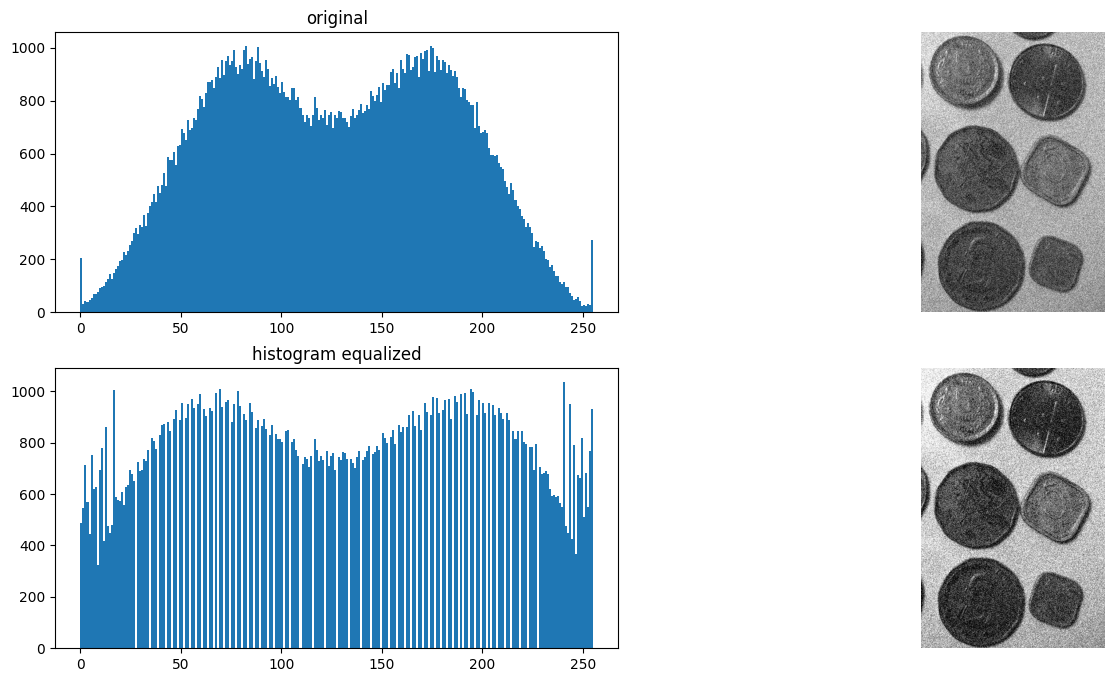

In [29]:
def plot_hists(data):
    fig, axes = plt.subplots(2, 2, figsize=(16, 8))
    
    for ax, (key, img) in zip(axes, data.items()):
        ax[0].set_title(key)
        ax[0].hist(img.flatten(), bins=255)
        ax[1].imshow(img, cmap="gray")
        ax[1].axis("off")

    plt.show()

data = {
    "original": coins_noise,
    "histogram equalized": cv2.equalizeHist(coins_noise)
}
plot_hists(data)

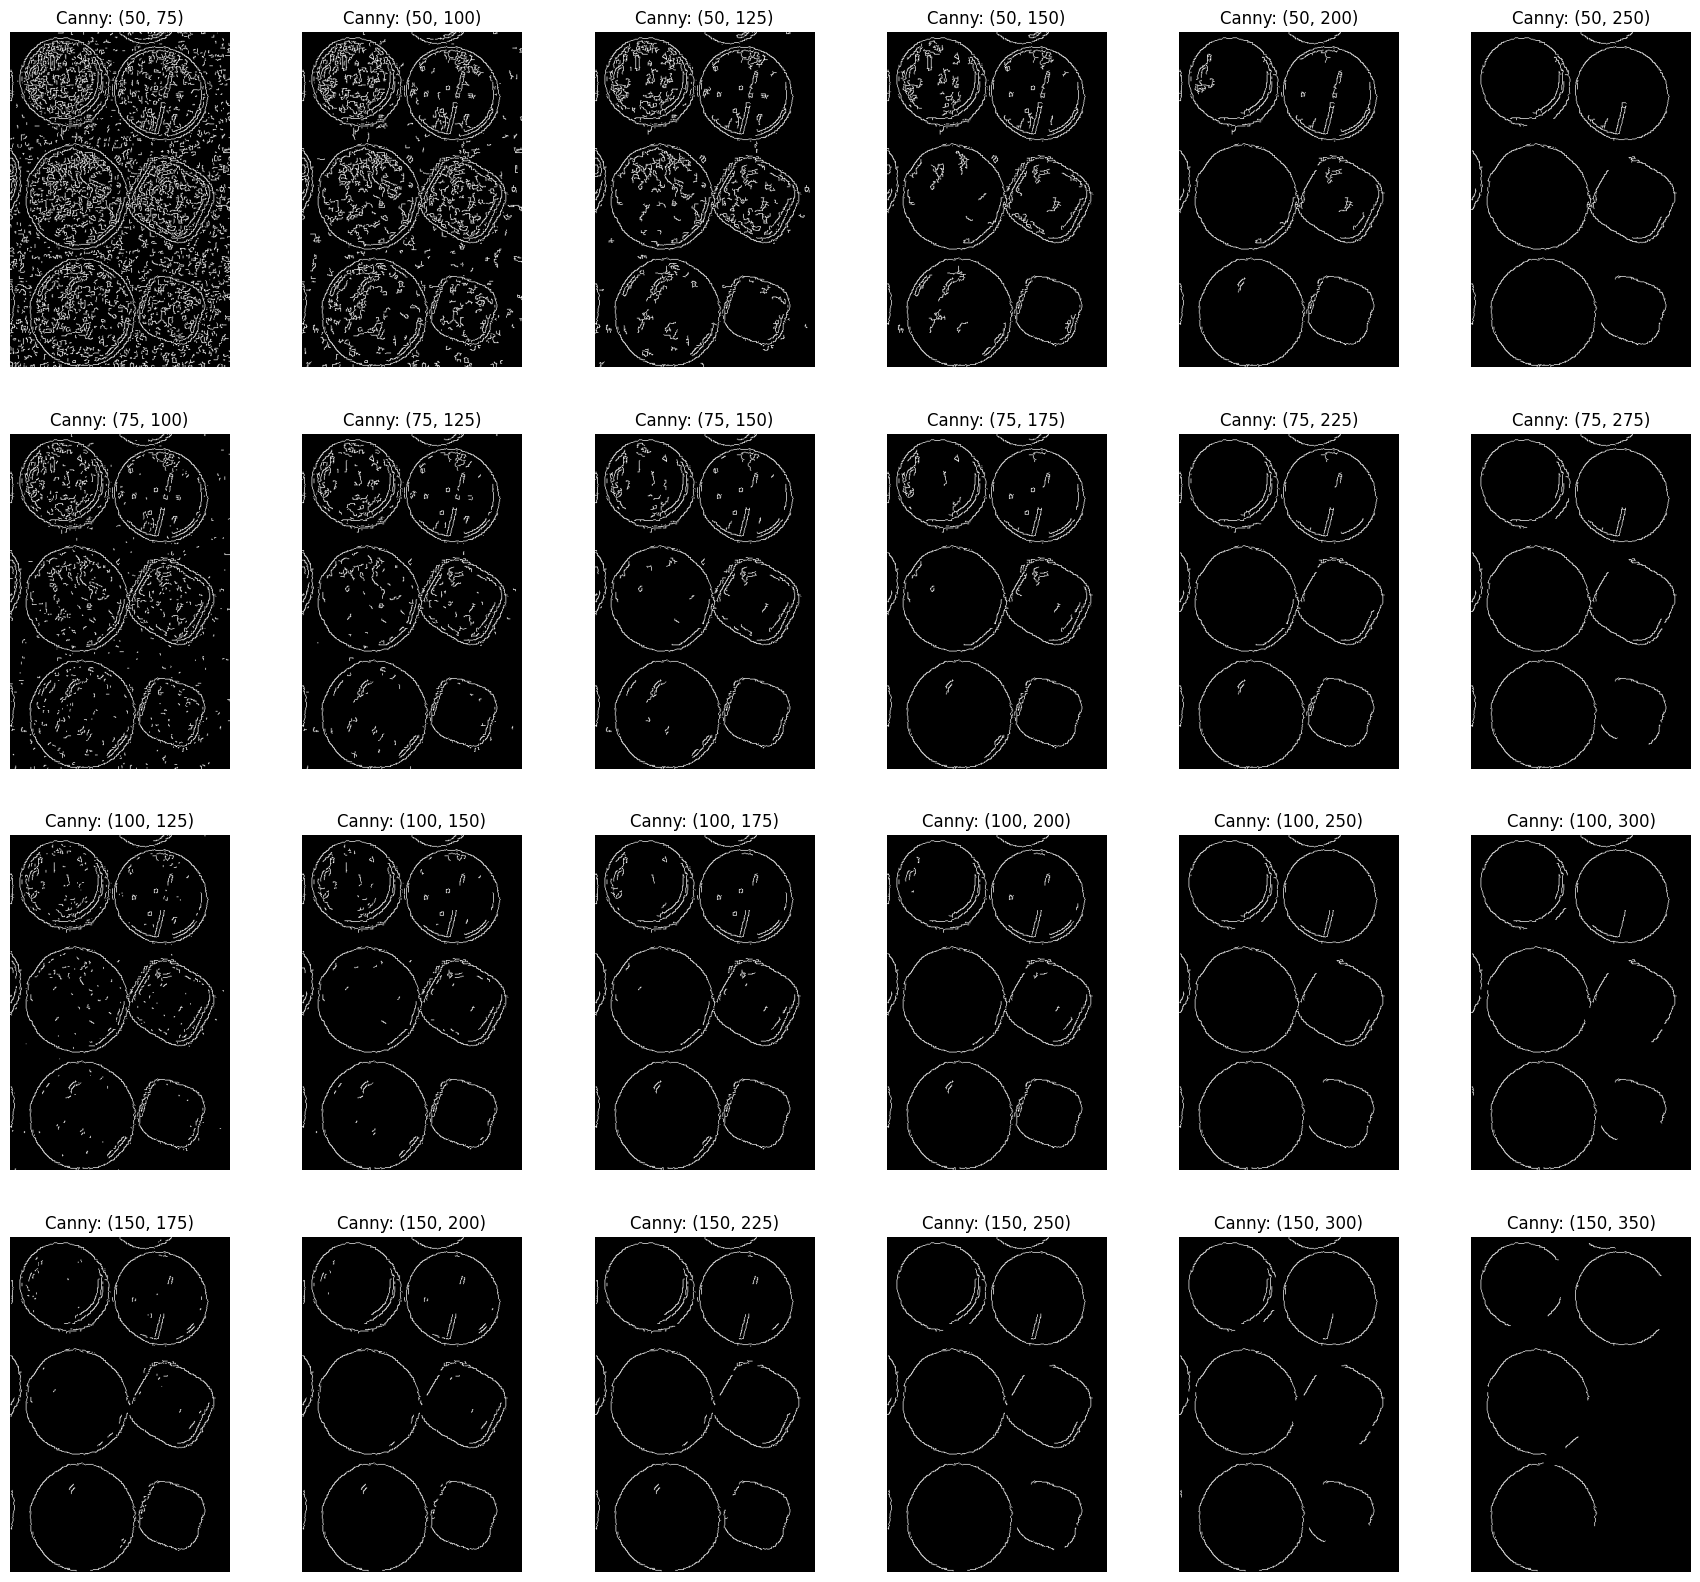

In [32]:
data = [
    (t1, t1 + t2, cv2.Canny(cv2.blur(cv2.equalizeHist(coins_noise), (5, 5)), threshold1=t1, threshold2=t1 + t2))
    for t1 in [50, 75, 100, 150] for t2 in [25, 50, 75, 100, 150, 200]    
]
plot_canny(data)

---

##### Zad. 4: Transformacja do rozkładu docelowego

Dla obrazów `hare_gray` i `hare_color` wykonaj transformacje na składowych S i/lub V modelu HSV, przechodząc do wybranego (założonego) rozkładu docelowego, tak aby zmaksymalizować możliwość wyodrębnienia obiektu z otoczenia (zająca) przy użyciu algorytmu binaryzacji Otsu.

Podpowiedź: przedstawiona we wstępie teoretycznym transformacja obu rozkładów (źródłowego i docelowego) do rozkładu jednostajnego _nie musi_ zostać faktycznie wykonana (dlatego nie używaj w zadaniu funkcji `cv2.equalizeHist`)! Wystarczy porównywanie ze sobą wartości ze skumulowanych rozkładów (rysunek 3).

Podpowiedź 2: [cv2.LUT](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)

**4A** (`hare_gray`):

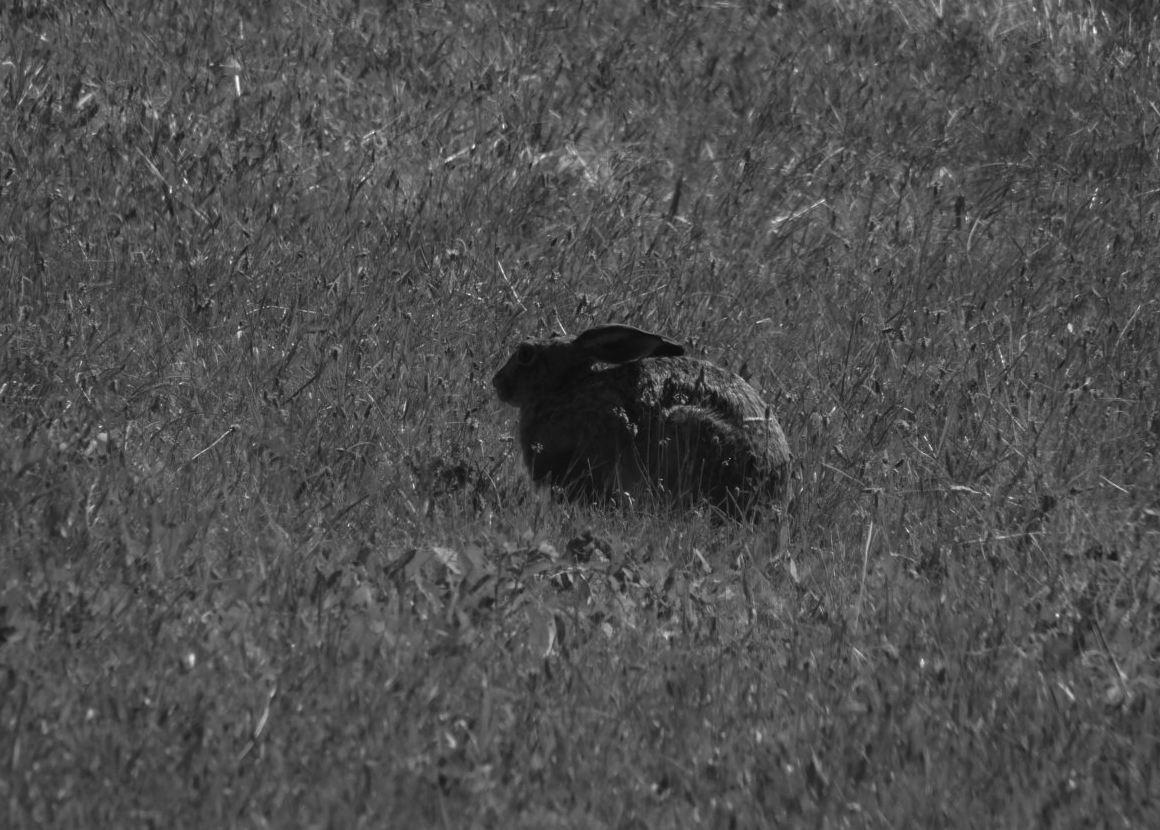

In [5]:
hare_gray = cv2.imread('Zajac.jpg', cv2.IMREAD_GRAYSCALE)
Image.fromarray(hare_gray)

Rozwiązanie:

---

**4B** (`hare_color`):

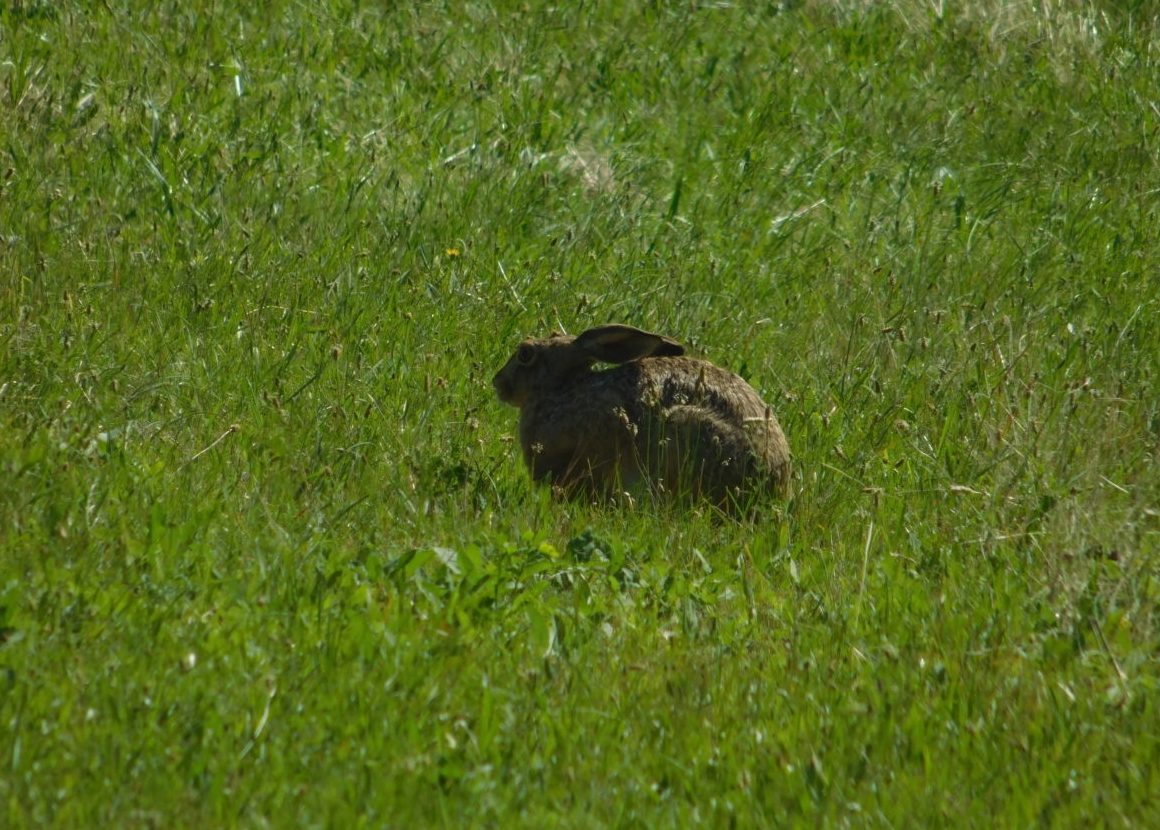

In [6]:
hare_color = cv2.imread('Zajac_kolor.jpg')
Image.fromarray(hare_color[..., ::-1])

Rozwiązanie: